In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../src')
import tensorflow as tf
import tensorflow.keras as k
import pandas as pd
import numpy as np
import test_submit
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
train = pd.read_pickle('../inputs/dataset/train.pkl')
investment_id = train.pop('investment_id')
y = train.pop('target')

In [4]:
investment_ids = list(investment_id.unique())
investment_id_size = len(investment_ids) + 1
investment_id_lookup_layer = k.layers.IntegerLookup(max_tokens=investment_id_size)
investment_id_lookup_layer.adapt(pd.DataFrame({"investment_ids":investment_ids}))

2022-03-04 22:09:39.612265: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-04 22:09:43.647126: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38411 MB memory:  -> device: 0, name: A100-SXM4-40GB, pci bus id: 0000:07:00.0, compute capability: 8.0
2022-03-04 22:09:43.649155: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38411 MB memory:  -> device: 1, name: A100-SXM4-40GB, pci bus id: 0000:0f:00.0, compute capability: 8.0
2022-03-04 22:09:43.651569: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/

In [35]:
investment_id_size

3580

In [40]:
[i for i in range(3774) if i not in a]

[5,
 25,
 27,
 38,
 39,
 96,
 113,
 119,
 133,
 153,
 186,
 210,
 221,
 223,
 247,
 256,
 262,
 288,
 313,
 320,
 347,
 348,
 355,
 359,
 380,
 452,
 456,
 475,
 477,
 505,
 519,
 522,
 530,
 541,
 545,
 608,
 635,
 648,
 661,
 680,
 684,
 686,
 692,
 712,
 737,
 759,
 779,
 802,
 825,
 836,
 853,
 856,
 927,
 937,
 945,
 948,
 964,
 971,
 981,
 988,
 1032,
 1043,
 1050,
 1063,
 1093,
 1103,
 1118,
 1130,
 1145,
 1216,
 1229,
 1242,
 1243,
 1253,
 1326,
 1343,
 1348,
 1359,
 1374,
 1377,
 1387,
 1419,
 1428,
 1467,
 1498,
 1597,
 1611,
 1661,
 1662,
 1678,
 1694,
 1781,
 1793,
 1851,
 1864,
 1870,
 1877,
 1897,
 1899,
 1939,
 1944,
 1978,
 1988,
 2012,
 2018,
 2044,
 2068,
 2093,
 2094,
 2099,
 2115,
 2116,
 2130,
 2162,
 2168,
 2199,
 2214,
 2217,
 2258,
 2268,
 2275,
 2293,
 2323,
 2345,
 2351,
 2364,
 2366,
 2368,
 2399,
 2405,
 2445,
 2448,
 2468,
 2504,
 2508,
 2511,
 2529,
 2531,
 2571,
 2582,
 2588,
 2596,
 2603,
 2608,
 2675,
 2679,
 2681,
 2718,
 2733,
 2760,
 2773,
 2790,
 27

In [42]:
investment_id_lookup_layer(5).numpy()

0

In [37]:
a = set(investment_id.unique())
b = investment_id_lookup_layer(investment_id.unique())
print(len(a))
print(b.numpy().max())
print(investment_id.max())


[investment_id_lookup_layer(i).numpy() for i in range(3600, 4000)]

3579
3579
3773


[167,
 166,
 165,
 164,
 163,
 162,
 161,
 160,
 159,
 158,
 157,
 156,
 155,
 154,
 153,
 152,
 151,
 150,
 149,
 148,
 147,
 146,
 145,
 144,
 143,
 142,
 141,
 140,
 139,
 138,
 137,
 136,
 135,
 134,
 133,
 132,
 131,
 130,
 129,
 128,
 127,
 126,
 125,
 124,
 123,
 122,
 121,
 120,
 119,
 118,
 117,
 116,
 115,
 114,
 113,
 112,
 111,
 110,
 109,
 0,
 108,
 107,
 106,
 105,
 104,
 103,
 102,
 101,
 100,
 99,
 98,
 97,
 96,
 95,
 94,
 93,
 92,
 91,
 90,
 89,
 88,
 0,
 87,
 86,
 85,
 0,
 0,
 84,
 83,
 82,
 81,
 80,
 79,
 78,
 77,
 76,
 75,
 74,
 73,
 72,
 71,
 70,
 69,
 68,
 67,
 0,
 66,
 65,
 64,
 63,
 62,
 61,
 60,
 59,
 58,
 57,
 56,
 55,
 0,
 54,
 53,
 52,
 51,
 50,
 49,
 48,
 47,
 46,
 45,
 44,
 43,
 42,
 41,
 40,
 39,
 38,
 37,
 36,
 35,
 34,
 33,
 32,
 31,
 30,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0

In [5]:
features = [f'f_{i}' for i in range(300)]
batch_size = 1024
epochs = 30

def get_model():
    # activation = 'relu'
    # kernel_regularizer = None
    activation = 'swish'
    kernel_regularizer = 'l2'

    investment_id_inputs = tf.keras.Input((1, ), dtype=tf.uint16)
    investment_id_x = investment_id_lookup_layer(investment_id_inputs)
    investment_id_x = k.layers.Embedding(investment_id_size, 32, input_length=1)(investment_id_x)
    investment_id_x = k.layers.Reshape((-1, ))(investment_id_x)
    investment_id_x = k.layers.Dense(64, activation=activation)(investment_id_x)
    investment_id_x = k.layers.Dense(64, activation=activation)(investment_id_x)
    investment_id_x = k.layers.Dense(64, activation=activation)(investment_id_x)
    


    feature_inputs = k.Input((300,), dtype=tf.float16)
    feature_x = k.layers.Dense(256, activation=activation)(feature_inputs)
    feature_x = k.layers.Dense(256, activation=activation)(feature_x)
    feature_x = k.layers.Dropout(.5)(feature_x)
    feature_x = k.layers.Dense(256, activation=activation)(feature_x)

    x = k.layers.Concatenate(axis=1)([investment_id_x, feature_x])
    x = k.layers.Dense(512, activation=activation, kernel_regularizer=kernel_regularizer)(x)
    x = k.layers.Dense(128, activation=activation, kernel_regularizer=kernel_regularizer)(x)
    x = k.layers.Dense(32, activation=activation, kernel_regularizer=kernel_regularizer)(x)

    # output = k.layers.Dense(1, activation='sigmoid')(x)
    output = k.layers.Dense(1)(x)

    model = k.Model(inputs=[investment_id_inputs, feature_inputs], outputs=[output])
    model.compile(optimizer=k.optimizers.Adam(0.001), loss='mse', metrics=['mse', 'mae', 'mape'])

    return model

def eval(model):
    return test_submit.eval(lambda test: model.predict(test[features]))

def make_dataset(feature, y, investment_id, mode="train"):
    ds = tf.data.Dataset.from_tensor_slices(((investment_id, feature), y))
    if mode == "train":
        ds = ds.shuffle(4096)
    ds = ds.batch(batch_size).cache().prefetch(tf.data.experimental.AUTOTUNE)
    return ds


def get_callbacks(i):
    checkpoint = k.callbacks.ModelCheckpoint(f'../outputs/models/simple_nn_{i}', save_best_only=True)
    earlystopping = k.callbacks.EarlyStopping(patience=10)
    return [checkpoint, earlystopping]


In [22]:
import pickle
def cal_pearson(investment_id, y, pred_y):
    investment_id = pickle.load(open('investment_id.dump', 'rb'))
    y = pickle.load(open('y.dump', 'rb'))
    pred_y = pickle.load(open('pred_y.dump', 'rb'))
    
    df = pd.DataFrame({
        'id': investment_id,
        'y': y,
        'pred_y': pred_y
    })


    return df

t = cal_pearson(1,1,1)
# stats.pearsonr(ds.y, ds.pred_y)
[ds.shape  for _, ds in t.groupby('id') if ds.shape[0] <=2]

[(2, 3), (1, 3), (1, 3), (2, 3), (1, 3)]

In [41]:
tt = pd.read_pickle('../inputs/dataset/train.pkl')
tt.groupby('investment_id').count().describe().time_id


count    3579.000000
mean      877.734004
std       314.977410
min         2.000000
25%       683.000000
50%      1009.000000
75%      1131.000000
max      1211.000000
Name: time_id, dtype: float64

In [6]:
from sklearn.model_selection import KFold, StratifiedKFold

models = []
# kfold = KFold(5, shuffle=True, random_state=23)
kfold = StratifiedKFold(5, shuffle=True, random_state=23)

for i, (train_indices, target_indices) in enumerate(kfold.split(train[features], investment_id)):
    X_train, X_val = train.loc[train_indices, features], train.loc[target_indices, features]
    y_train, y_val = y.loc[train_indices], y.loc[target_indices]
    investment_id_train, investment_id_val = investment_id.loc[train_indices], investment_id.loc[target_indices]
    train_ds = make_dataset(X_train, y_train, investment_id_train)
    val_ds = make_dataset(X_val, y_val, investment_id_val, mode='val')

    model = get_model()
    # history = model.fit(
    #     train_ds,
    #     validation_data=val_ds,
    #     epochs=epochs,
    #     callbacks=get_callbacks(i)
    # )
    k.models.load_model(f'../outputs/models/simple_nn_{i}')
    models.append(model)

# for i, (train_indices, target_indices) in enumeration
    pearson_score = stats.pearsonr(model.predict(val_ds).ravel(), y_val.values)
    print('Pearson:', pearson_score)
    pd.DataFrame(history.history, columns=['mse', 'val_mse']).plot()
    plt.title("MSE")
    pd.DataFrame(history.history, columns=['mae', 'val_mae']).plot()
    plt.title("MAE")
    plt.show()

/opt/conda/envs/ubiquant/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/opt/conda/envs/ubiquant/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydev_bundle/_pydev_imports_tipper.py:219: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  obj = getattr(obj_to_complete, d)
/opt/conda/envs/ubiquant/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydev_bundle/_pydev_imports_tipper.py:219: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  obj = getattr(obj_to_complete, d)
/opt/conda/envs/ubiquant/lib/python3.9/site-packages/debugpy/_vendored/pydevd/_pydev_bundle/_pydev_imports_tipper.py:219: FutureWarning: pandas.UInt64Index is deprecated an

Pearson: (-0.03143025187489511, 4.624763525171976e-137)


NameError: name 'history' is not defined

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
integer_lookup (IntegerLookup)  (None, 1)            0           input_11[0][0]                   
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 1, 32)        114560      integer_lookup[5][0]             
__________________________________________________________________________________________________
input_12 (InputLayer)           [(None, 300)]        0                                            
____________________________________________________________________________________________

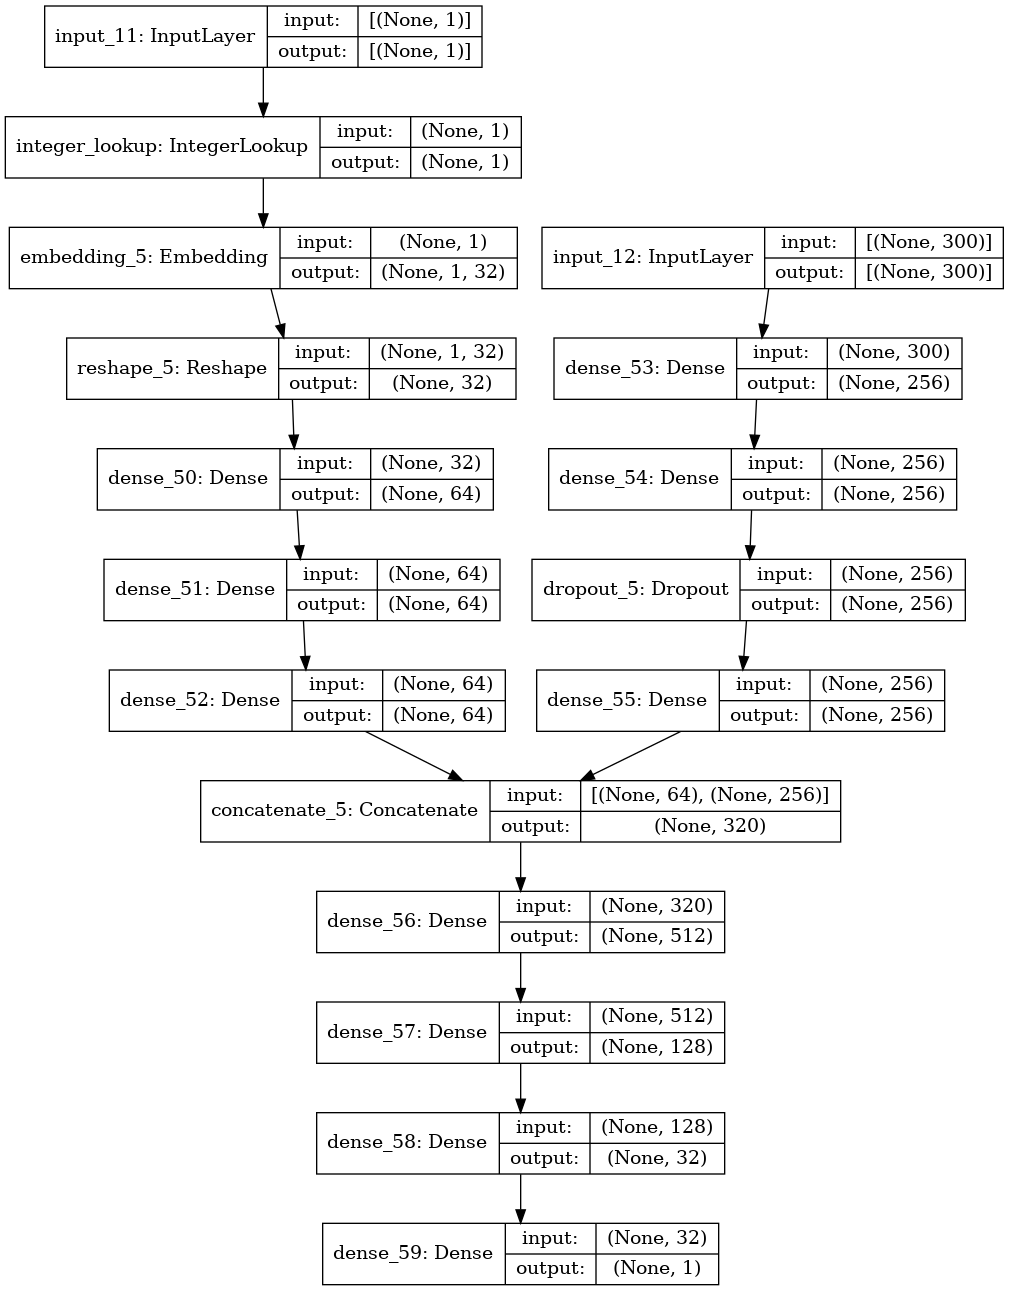

In [7]:
model = get_model()
model.summary()
k.utils.plot_model(model, show_shapes=True)

In [8]:
def preprocess_test(investment_id, feature):
    return (investment_id, feature), 0

# def preprocess_test(feature):
#     return feature, 0

def make_test_dataset(feature, investment_id, batch_size=1024):
    ds = tf.data.Dataset.from_tensor_slices(((investment_id, feature)))
#     ds = tf.data.Dataset.from_tensor_slices(feature)
    ds = ds.map(preprocess_test)
    ds = ds.batch(batch_size).cache().prefetch(tf.data.experimental.AUTOTUNE)
    return ds

def inference(models, ds):
    y_preds = []
    for model in models:
        y_pred = model.predict(ds)
        y_preds.append(y_pred)
    return np.mean(y_preds, axis=0).ravel()
    

models = []
for i in range(5):
    models.append(k.models.load_model(f'../outputs/models/simple_nn_{i}'))




test_df = pd.read_csv('../inputs/dataset/example_test.csv')
sample_prediction_df = pd.read_csv('../inputs/dataset/example_sample_submission.csv')
ds = make_test_dataset(test_df[features],  test_df["investment_id"])
sample_prediction_df['target'] = inference(models, ds)

2022-03-03 23:47:15.324901: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2022-03-03 23:47:15.324945: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


In [9]:
sample_prediction_df

,row_id,time_id,target
0,1220_1,1220,-0.057361
1,1220_2,1220,0.038725
2,1221_0,1221,-0.043847
3,1221_1,1221,-0.019396
4,1221_2,1221,-0.101181
5,1222_0,1222,-0.052097
6,1222_1,1222,0.002587
7,1222_2,1222,-0.025135
8,1223_0,1223,-0.015279
